# Velib' DataCamp: predicting if a station will be full or empty in the next hour

*Thomas Sergent, Tina Béclin, Maéva Roulot, Lorenzo Gentili, Walid Nasr*

## Introduction

Vélib' stations can only contain a limited number of locations for logistical and economic reasons.
Vélib' stations at greater elevations generally experience greater demand. Consequently, bicycles may be completely unavailable in some locations, whilst parking problems exist for others. Vélib' is faced with logistical issues, and is constantly having to relocate bicycles during the course of the day.

The goal is to develop prediction models able to identify which velib' station will be full or empty at H+1.

The data we will manipulate is from https://opendata.paris.fr/page/home/.


## The prediction task


The goal is to predict if a station will be empty or full in the next hour. Indeed, using the data at h-1 we will predict if a station is empty of full at hour h. Without taking into account if a station is filled in the meantime.

This prediction will allow Vélib’ to be more efficient in the redistribution of the bicycles in the stations knowing which station will be empty in an hour, the vans and bus journey will be more efficient on deserving the stations.


## Imports

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Exploratory data analysis

### Loading the data

In [72]:
data = pd.read_csv("C:/Users/loren/Desktop/velib-disponibilite-en-temps-reel.csv", sep=';')
data = data.fillna('')
data


,station_id,name,numBikesAvailable,is_installed,is_renting,numDocksAvailable,is_returning,capacity,lon,lat,xy
0,27415736,,0,1,1,0,1,,,,
1,7261,Athènes - Clichy,4,1,1,16,1,20,2.32956,48.8781,"48.8781137879, 2.32956021946"
2,27415150,,0,1,1,0,1,,,,
3,27363337,,1,1,1,32,1,,,,
4,27414527,,1,1,1,19,1,,,,
5,63297,Eglise d'Auteuil,13,1,1,8,1,0,2.26848,48.8475,"48.8474984177, 2.26848387135"
6,35471668,,15,1,1,16,1,,,,
7,38407,Flandrin - Longchamp,5,1,1,37,1,42,2.27435,48.8688,"48.8687784918, 2.27435453918"
8,27415411,,4,1,1,19,1,,,,
9,11580442,Geoffroy-Saint-Hilaire - Saint-Marcel,5,1,1,13,1,18,2.35688,48.8391,"48.8390782642, 2.35687734067"


In [73]:
data.dtypes

station_id            int64
name                 object
numBikesAvailable     int64
is_installed          int64
is_renting            int64
numDocksAvailable     int64
is_returning          int64
capacity             object
lon                  object
lat                  object
xy                   object
dtype: object

In [74]:
data.describe()

,station_id,numBikesAvailable,is_installed,is_renting,numDocksAvailable,is_returning
count,2.140000e+02,214.000000,214.0,214.0,214.000000,214.0
mean,2.051313e+07,4.509346,1.0,1.0,20.112150,1.0
std,1.317733e+07,4.427550,0.0,0.0,12.054514,0.0
min,6.245000e+03,0.000000,1.0,1.0,0.000000,1.0
25%,1.320416e+07,1.000000,1.0,1.0,14.000000,1.0
50%,2.736316e+07,3.000000,1.0,1.0,20.000000,1.0
75%,2.741541e+07,7.000000,1.0,1.0,27.000000,1.0
max,3.931127e+07,21.000000,1.0,1.0,63.000000,1.0


In [75]:
data.count()

station_id           214
name                 214
numBikesAvailable    214
is_installed         214
is_renting           214
numDocksAvailable    214
is_returning         214
capacity             214
lon                  214
lat                  214
xy                   214
dtype: int64

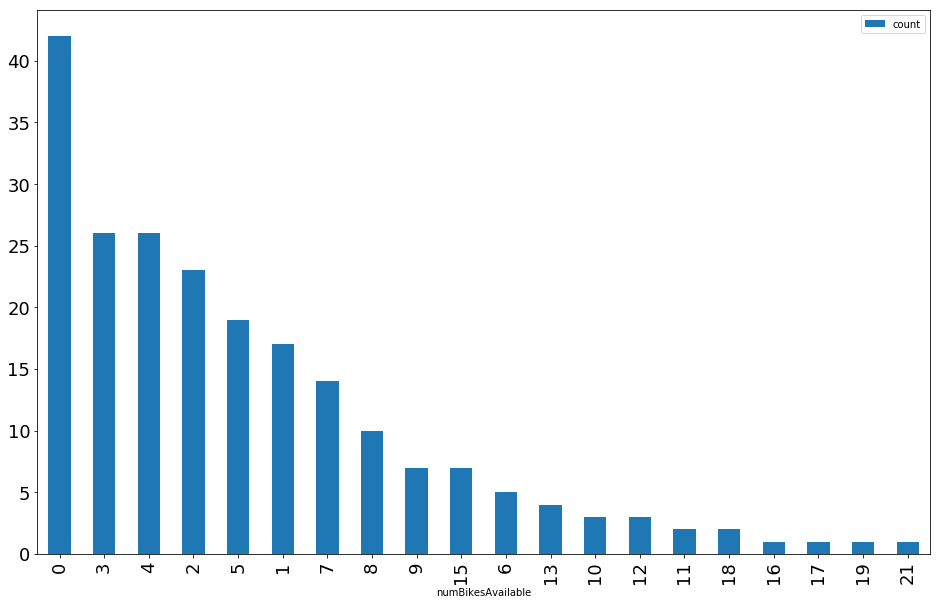

In [76]:
data.groupby('numBikesAvailable').count()[['station_id']].sort_values(
    'station_id', ascending=False).reset_index().rename(
    columns={'station_id': 'count'}).plot.bar(
    x='numBikesAvailable', y='count', figsize=(16, 10), fontsize=18);

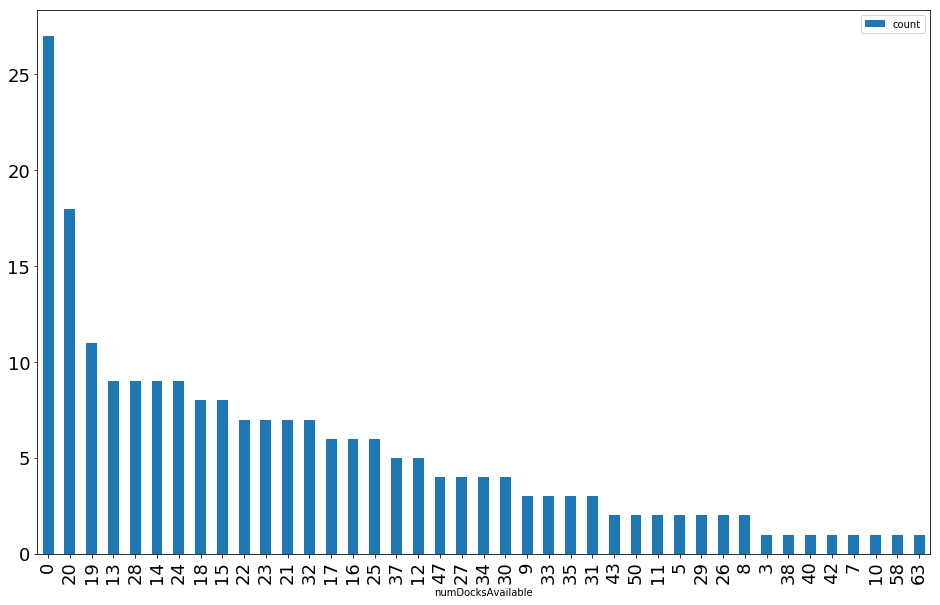

In [77]:
Nda=data.groupby('numDocksAvailable').count()[['station_id']].sort_values(
    'station_id', ascending=False).reset_index().rename(
    columns={'station_id': 'count'}).plot.bar(
    x='numDocksAvailable', y='count', figsize=(16, 10), fontsize=18);

In [78]:
print(np.unique(data['name']))
print(len(np.unique(data['name'])))


['' 'Alexander Fleming - Belvédère' 'Arsonval Falguière'
 'Assas - Luxembourg' 'Assas - Rennes' 'Athènes - Clichy' 'Bassano -  Iéna'
 'Belleville -  Pré Saint-Gervais' 'Bruant-Vincent Auriol'
 'Charenton - Jardiniers' 'Charonne - Pierre Bayle' 'Chernoviz - Raynouard'
 'Chevreuse - Montparnasse' 'Choron - Martyrs' 'Colonel Monteil - Brune'
 'Colonel Pierre Avia' 'Crevaux - Bugeaud' 'Cujas - Saint-Michel'
 'Duhamel - André Gide' "Eglise d'Auteuil" 'Favart - Italiens'
 'Flandrin - Longchamp' 'Galilée - Kléber'
 'Gare du Nord - Saint-Vincent de Paul' 'Gay Lussac - Saint-Jacques'
 'Geoffroy-Saint-Hilaire - Saint-Marcel' 'George Sand-Jean De La Fontaine'
 'Goubet - Darius Milhaud' 'Gouthière - Poterne des Peupliers'
 'Grands Moulins de Pantin' 'Hauteville - Bonne Nouvelle'
 'Hautpoul - Jean Jaurès' 'Institut de France'
 'Jean-Baptiste Pigalle - La Bruyere' 'Jules Vallès - Charonne'
 'La Motte-Picquet Grenelle' 'Le Brix et Mesmin-Jourdan'
 'Le Vau - Maurice Bertaux' 'Louis Lumière' 'Mairie du